In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris 

In [224]:
data=load_iris()
x=data.data
y=data.target

In [225]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.number_class = len(np.unique(y_train))
        
    def distance(self,a,b):
        dis = np.sqrt(np.sum((a-b)**2, axis = 1))
        return dis
        
    def nearestNeighbors(self, x_test):
        point_dist=[]
        for x in x_test:
            point_dist.append(self.distance(x,self.x_train))
            
        neigh_ind=[]
        for row in point_dist:
            near_neighbor = np.argsort(row)[:self.k]
            neigh_ind.append(near_neighbor)
            
        return np.array(neigh_ind)
    
    def predict(self, x_test):
        neighbors = self.nearestNeighbors(x_test)
        y_pred=[]
        for neighbor in neighbors:
            y_pred.append(np.argmax(np.bincount(self.y_train[neighbor])))
        return np.array(y_pred)
    
    def evaluate(self,x_test,y_test):
        temp=[]
        c=0
        self.x_test=x_test
        self.y_test=y_test
        temp=self.predict(self.x_test)
        for i in range(len(self.x_test)):
            if temp[i]==self.y_test[i]:
                c+=1
        ev=c/len(y_test)
        return ev

In [226]:
Kn=[1,3,5,7,9,11,13,15,17]
Evaluate=[]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25,random_state=4)
for i in Kn:
    knn=KNearestNeighbors(k=i)
    knn.fit(X_train,Y_train)
    a=knn.evaluate(X_test,Y_test)
    Evaluate.append(a)

<BarContainer object of 9 artists>

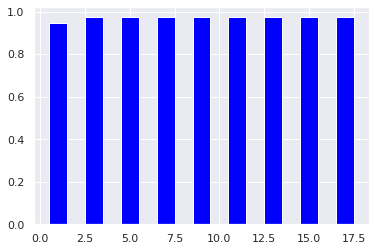

In [227]:
px=Evaluate
py=Kn
plt.bar(x=py,
        height=px,
        color='blue',
        width=1)


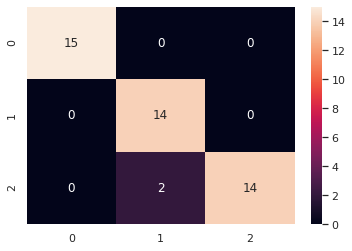

In [228]:
knn = KNearestNeighbors(k=5)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
f1_f1 =0
f1_f2 =0
f1_f3 =0
f2_f1 = 0
f2_f2 = 0
f2_f3 = 0
f3_f1 = 0
f3_f2 = 0
f3_f3 = 0
for i in range(len(Y_test)):
    if y_pred[i] == 0 and Y_test[i] == 0:
        f1_f1 += 1
    if y_pred[i] == 1 and Y_test[i] == 1:
        f2_f2 += 1
    if y_pred[i] == 2 and Y_test[i] == 2:
        f3_f3 += 1
    if y_pred[i] == 0 and Y_test[i] == 1:
        f1_f2 += 1
    if y_pred[i] == 0 and Y_test[i] == 2:
        f1_f3 += 1
    if y_pred[i] == 1 and Y_test[i] == 0:
        f2_f1 += 1
    if y_pred[i] == 1 and Y_test[i] == 2:
        f2_f3 += 1
    if y_pred[i] == 2 and Y_test[i] == 0:
        f3_f1 += 1
    if y_pred[i] == 2 and Y_test[i] == 1:
        f3_f2 += 1
        

import seaborn as sns
sns.set_theme()
udata = [[f1_f1,f1_f2,f1_f3],[f2_f1,f2_f2,f2_f3],[f3_f1,f3_f2,f3_f3]]
ax = sns.heatmap(udata,annot=True, fmt="d")